# STAT3612 Lecture 9 - 	Support Vector Machines 

[Dr. Aijun Zhang](http://www.statsoft.org) - [STAT3612 Statistical Machine Learning](https://ajzhanghku.github.io/Stat3612/)

3 November 2020

# SVM for Mixture Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import matplotlib.colors as col
def plot_decision_boundary(x, y, model, title):
    h = 0.02
    x_min, x_max = x[:, 0].min()-0.1, x[:, 0].max() +0.1
    y_min, y_max = x[:, 1].min()-0.1, x[:, 1].max() +0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    cmap_light = col.ListedColormap(['#AAFFAA','#AAAAFF','#FFAAAA'])
    cmap_bold = col.ListedColormap(['#00FF00','#0000FF','#FF0000'])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.clf()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(x[:, 0], x[:, 1], c=y, 
                    edgecolor='k',cmap=cmap_bold)
    
    plt.title(title, fontsize = 20)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
mixture_data = pd.read_csv("/content/drive/My Drive/Stat3612/mixture.csv", index_col = [0])
x_mix,y_mix=mixture_data.iloc[:,:2].values,mixture_data['y'].values

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

Accuracy: 0.73


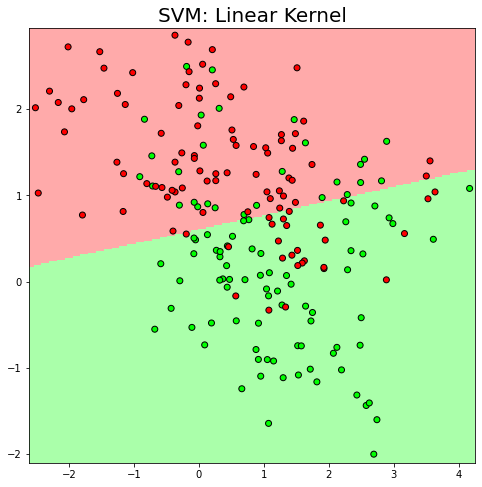

In [6]:
clf = SVC(kernel='linear')
clf.fit(x_mix,y_mix)
# decision boundary
print('Accuracy:',accuracy_score(y_mix,clf.predict(x_mix)))
plt.figure(figsize=(8, 8))
plot_decision_boundary(x_mix,y_mix,clf,"SVM: Linear Kernel")
plt.show()

Accuracy: 0.66


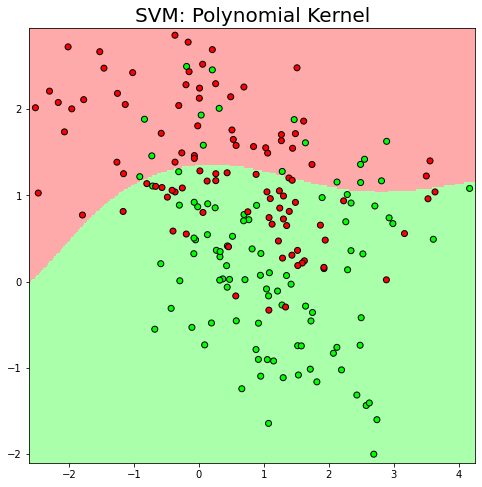

In [7]:
clf = SVC(kernel = 'poly', gamma='scale')
clf.fit(x_mix, y_mix)
# decision boundary
print('Accuracy:',accuracy_score(y_mix,clf.predict(x_mix)))
plt.figure(figsize=(8, 8))
plot_decision_boundary(x_mix,y_mix,clf,"SVM: Polynomial Kernel")
plt.show()

Accuracy: 0.79


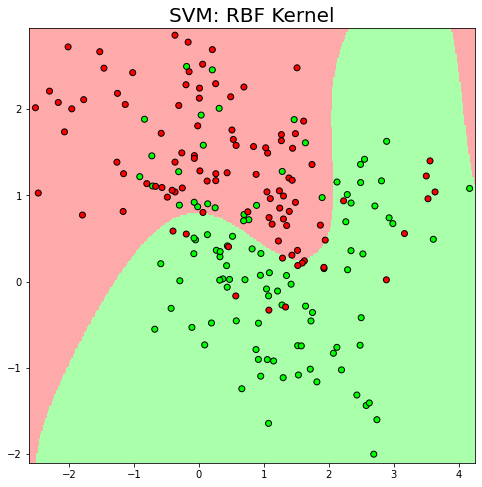

In [8]:
clf = SVC(kernel = 'rbf', gamma='scale')
clf.fit(x_mix, y_mix)
# decision boundary
print('Accuracy:',accuracy_score(y_mix,clf.predict(x_mix)))
plt.figure(figsize=(8, 8))
plot_decision_boundary(x_mix,y_mix,clf,"SVM: RBF Kernel")
plt.show()

# Hyperparameter Optimization

In [9]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

**Consider SVM with RBF Kernel**

In [10]:
# no tuning
svc = SVC(gamma="scale",kernel='rbf')
svc.fit(x_mix,y_mix)
print('Accuracy:',accuracy_score(y_mix,svc.predict(x_mix)))

Accuracy: 0.79


## Grid Search

In [11]:
param_grid = [
  {'C': np.logspace(0.1,1,10), 'gamma': np.logspace(-3,3,10)},
 ]
svc = SVC(gamma="scale",kernel='rbf')
clf = GridSearchCV(svc, param_grid, cv=5, verbose=1)
clf.fit(x_mix,y_mix)
print('Accuracy:',accuracy_score(y_mix,clf.predict(x_mix)))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy: 0.865


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.1s finished


## Random Search

In [12]:
# in randomized search, we can specify the parameter distribution
import scipy.stats as sps
param_grid = {'C': sps.uniform(loc=1,scale=2), 'gamma': sps.uniform(loc=0.01,scale=20)}
np.random.seed(2019)
svc = SVC(gamma="scale")
clf = RandomizedSearchCV(svc, param_grid, cv=5,n_iter=100,verbose=1)
clf.fit(x_mix,y_mix)
print('Accuracy:',accuracy_score(y_mix,clf.predict(x_mix)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Accuracy: 0.88


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.2s finished
